# Proyecto Final Fundamentos de Aprendizaje Automático.

## 1- Introducción

### 1.a- Presentación del problema:

En este Jupyter Notebook, se aborda la resolución de un problema de clasificación de imágenes enfocado en la detección del virus COVID-19. El COVID-19 es un virus que ha mantenido al mundo en alerta durante un período prolongado debido a su alta capacidad de contagio y la gravedad de sus consecuencias. La detección de la presencia del virus en el organismo humano no ha sido una tarea sencilla, ya que los métodos tradicionales, como los test de antígenos, generan una gran cantidad de residuos y su fiabilidad no siempre es la más alta.

Una de las complicaciones más serias asociadas al COVID-19 es que algunas personas desarrollan neumonía como consecuencia de la infección. La detección temprana y precisa de esta neumonía es crucial para el tratamiento adecuado de los pacientes. En este contexto, el uso de imágenes de rayos X de tórax se ha convertido en una herramienta valiosa para el diagnóstico.

El objetivo de este proyecto es clasificar imágenes de rayos X de tórax para detectar la presencia de neumonía y, específicamente, determinar si es causada por COVID-19. Utilizaremos un conjunto de datos de código abierto compuesto por imágenes etiquetadas en tres categorías:

1. COVID-19: El paciente de la imagen presenta neumonía debido a la infección por COVID-19.
2. Normal: El paciente de la imagen no presenta neumonía.
3. Neumonía: El paciente presenta neumonía, pero no es causada por COVID-19.

Para lograr esta clasificación, se aplicarán técnicas avanzadas de aprendizaje automático y visión por computadora, aprovechando la disponibilidad de datos abiertos y la capacidad de procesamiento de dichas imágenes. Con este enfoque es posible mejorar la detección del COVID-19 y que también podría reducir la dependencia de métodos de prueba más invasivos, optimizando así los recursos sanitarios y mejorando los tiempos de respuesta en el diagnóstico.

### 1.b- Obtención de los datos:

Los datos han sido obtenidos de repositorios de datos destinados para trabajos de investigación y académicos. Se dejan disponibles los hipervínculos a las direcciones webs de donde fueron extraídos:

1. [Kaggle-Data-1]
2. [Mendeley-Data]
3. [Kaggle-Data-2]

Los datos en general vienen clasificados según las categorías mencionadas en la sección anterior. A su vez, en los datos de Kaggle, vienen separados en carpetas de `test` y `train`. Las imágenes tienen dimensiones diferentes entre sí, incluso diferente relación de aspecto entre ellas. Este es un aspecto que será tratado al comienzo del procesamiento de los datos.

[Kaggle-Data-1]: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
[Mendeley-Data]: https://data.mendeley.com/datasets/dvntn9yhd2/1
[Kaggle-Data-2]: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia


### 1.c- Hardware para la resolución del problema:

Para la resolución del problema se utilizará una laptop para las operaciones que no sean muy costosas computacionalmente. Adicionalmente, a la hora de entrenar modelos que son paralelizables, como ConvNets, se utilizará la plataforma de `GoogleColab` ya que tiene optimizado la paralelización de este tipo de redes, utilizando GPUs.

## 2. EDA (Análisis Exploratorio de Datos)

### 2.a- Preprocesado de imágenes:

Las cantidad de imágenes con las que se cuenta, tomando como fuente los datasets mencionados arriba, se encuentra disponible en la siguiente tabla.

<div align="center">
        
| DataSet  | Covid | Normal | Neumonía |
|----------|-------|--------|----------|
| Kaggle-1 |137|90|90|
| Mendeley |1626|1802|1800|
| Kaggle-2 |576|1583|4273|
| Total    |2334|3475|6163|

</div>

En particular lo que se realza es un preprocesado de las imágenes, llevandolas a el mismo tamaño para todas: cuadradas de lado `SIZE`. En principio, se elige `SIZE` = 256, aunque esto podría ser modificado más adelante. Todo este procesamiento se encuentra en el notebook que se encuentra en el directorio `...\data\preprocess_images.ipynb`.

Las imágenes preprocesadas, se encuentran en el directorio `...data\preprocess_data\`, donde allí se encuentran las tres categorías:

- `Covid\` (2334 imágnes)
- `Normal\` (3475 imágenes)
- `Pneumonia\` (6163 imágnes) 

### 2.b- Análisis de los datos:

In [1]:
#Librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [5]:
# Configuración de seaborn para los gráficos
sns.set(style="whitegrid")

# Directorios de las imágenes preprocesadas
notebook_dir = os.getcwd()
data_dir = os.path.join(notebook_dir, 'data\\processed_data')
categories = ['Covid', 'Normal', 'Pneumonia']

Número de imágenes por categoría

Cantidad de imágnes por categoría: 
Covid: 2334 imágenes
Normal: 3475 imágenes
Pneumonia: 6163 imágenes


c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


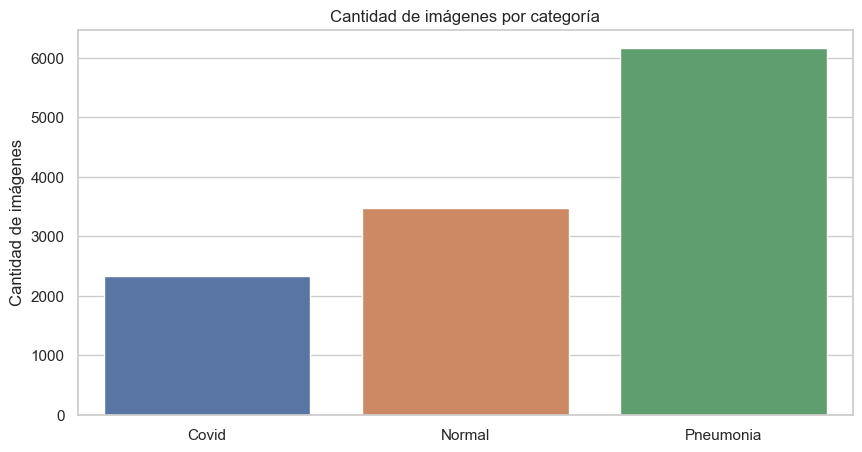

Proporciones de imágenes por categoría: 
Covid: 19.50%
Normal: 29.03%
Pneumonia: 51.48%


In [14]:
image_counts = {category: len(os.listdir(os.path.join(data_dir, category))) for category in categories}
print("Cantidad de imágnes por categoría: ")
for category, count in image_counts.items():
    print(f"{category}: {count} imágenes")

# Lo vemos gráficamente en un gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Cantidad de imágenes por categoría")
plt.ylabel("Cantidad de imágenes")
plt.show()

# Proporciones de cada categoría
total_images = sum(image_counts.values())
proportions = {category: count / total_images for category, count in image_counts.items()}
print("Proporciones de imágenes por categoría: ")
for category, proportion in proportions.items():
    print(f"{category}: {proportion:.2%}")

#### 2.b.1- Ejemplos de imágenes

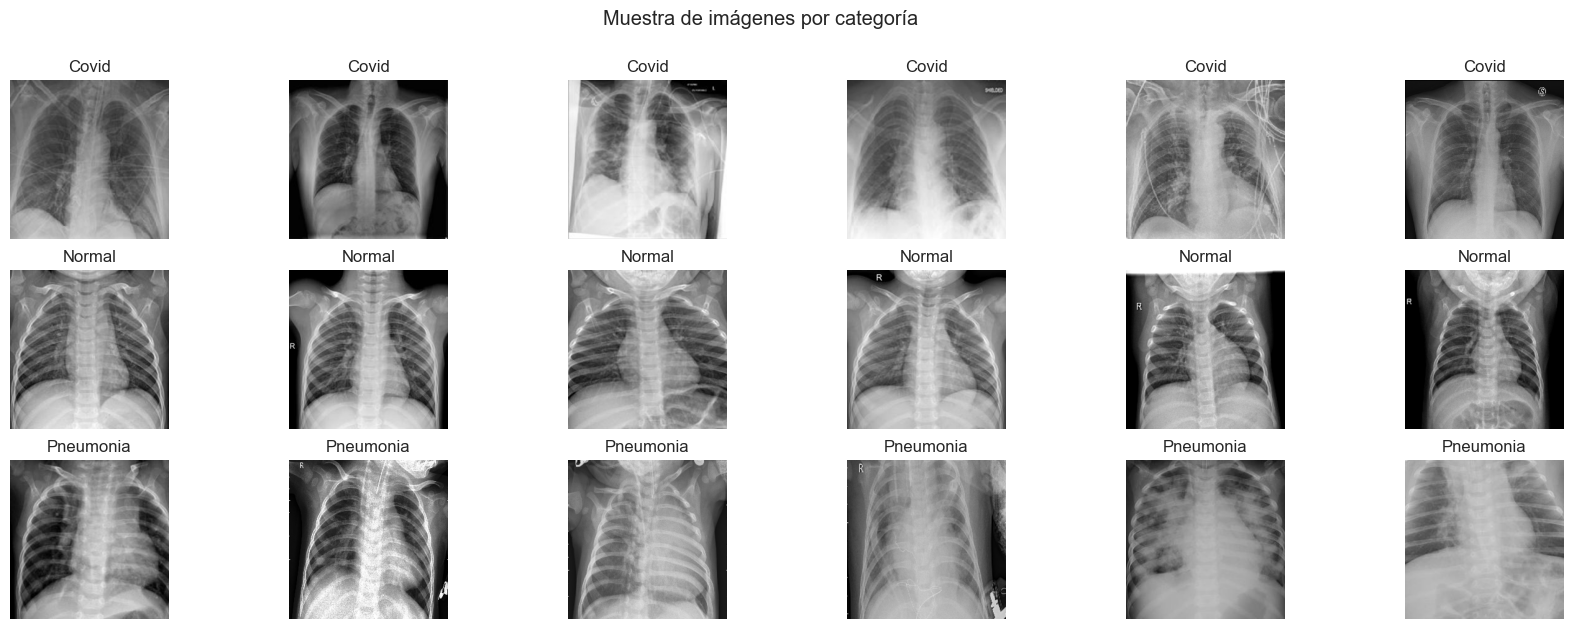

In [27]:
sample_size = 6
fig, axes = plt.subplots(len(categories), sample_size, figsize=(21, 7))
for i, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    sample_images = np.random.choice(os.listdir(category_dir), sample_size, replace=False)
    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(category)
plt.suptitle('Muestra de imágenes por categoría')
plt.show()
plt.show()

Obsevacion: Luego de haber observado de haber corrido de manera repetitiva el código de arriba, una cosa a notar es que en muchas de las imagenes de neumonía por covid, se observan cables conectados a los pacientes, cosa que no ocurre en las otras dos categorías. Estimo que esto ocurre debido a que muchas imágenes de la categoría `Covid` han sido tomadas en situaciones donde el paciente se encuentra internado, y conectado a diferentes aparatos al mismo tiempo de la toma de la imagen.